# Visualization of datasets
**FIZ228 - Numerical Analysis**  
Dr. Emre S. Tasci, Hacettepe University

It's always beneficial to check the data before and after we process it as it can offer some hidden relations or the picking of off values. Even though the `matplotlib` module offers elasticity, unfortunately it is not known for its practicality. Wrappers like the `seaborn` module provide functionality with ease.

## "El Clasico"

Let's try to do it old way, using numpy & matplotlib. As we have observed in our previous lecture, pandas were the go-to module when dealing with datasets, but for reference purposes, we'll start with numpy arrays. As numpy arrays can not (by default) store elements of different types, our string timestamps are lost in import.

For the beginners, we are going to use the meteorological data of the Basel city, obtained from [meteoblue.com](https://www.meteoblue.com/en/weather/archive/export?daterange=2022-01-01%20-%202023-03-03&locations%5B%5D=basel_switzerland_2661604&domain=ERA5T&min=2022-01-01&max=2023-03-03&params%5B%5D=&params%5B%5D=temp2m&params%5B%5D=&params%5B%5D=relhum2m&params%5B%5D=&params%5B%5D=&params%5B%5D=totalClouds&params%5B%5D=&params%5B%5D=sunshine&params%5B%5D=swrad&params%5B%5D=&params%5B%5D=&params%5B%5D=&utc_offset=1&timeResolution=hourly&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30)

{download}`01_meteoblue_Basel_20230303T060433.csv<data/01_meteoblue_Basel_20230303T060433.csv>`

In [1]:
import numpy as np

In [2]:
data_np = np.genfromtxt("data/01_meteoblue_Basel_20230303T060433.csv", delimiter=',',
                        filling_values=0.0,skip_header=10)
data_np

array([[ 0.       ,  6.0602455, 94.19782  ,  1.5      ,  0.       ,
         0.       ],
       [ 0.       ,  5.5602455, 94.83262  ,  3.       ,  0.       ,
         0.       ],
       [ 0.       ,  4.630245 , 96.47203  ,  0.3      ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ]])

In [3]:
data_np.shape

(10248, 6)

We're going to implement meaningful indexes as the first column, by joining the year, month, day index with the hour.

Checking the timestamp of the top entries, we see that it goes from '20220101T0000' to '20230303T2300' (with most of the last entries being blank but we'll deal with it later).

In [4]:
flag_break = False
for y in range(22,24):
    if(flag_break):
        break
    for m in range(1,13):
        if(flag_break):
            break
        for d in range(1,32):
            if(flag_break):
                break
            if((m==2) & (d>28)):
                continue
            if((m in [2,4,6,9,11]) & (d>30)):
                continue
            for h in range (0,24):
                print('{:2d}{:02d}{:02d}{:02d}'.format(y,m,d,h))
                date = '{:2d}{:02d}{:02d}{:02d}'.format(y,m,d,h)
                if(date == '23030323'):
                    flag_break = True
                    break

22010100
22010101
22010102
22010103
22010104
22010105
22010106
22010107
22010108
22010109
22010110
22010111
22010112
22010113
22010114
22010115
22010116
22010117
22010118
22010119
22010120
22010121
22010122
22010123
22010200
22010201
22010202
22010203
22010204
22010205
22010206
22010207
22010208
22010209
22010210
22010211
22010212
22010213
22010214
22010215
22010216
22010217
22010218
22010219
22010220
22010221
22010222
22010223
22010300
22010301
22010302
22010303
22010304
22010305
22010306
22010307
22010308
22010309
22010310
22010311
22010312
22010313
22010314
22010315
22010316
22010317
22010318
22010319
22010320
22010321
22010322
22010323
22010400
22010401
22010402
22010403
22010404
22010405
22010406
22010407
22010408
22010409
22010410
22010411
22010412
22010413
22010414
22010415
22010416
22010417
22010418
22010419
22010420
22010421
22010422
22010423
22010500
22010501
22010502
22010503
22010504
22010505
22010506
22010507
22010508
22010509
22010510
22010511
22010512
22010513
22010514
2

22062922
22062923
22063000
22063001
22063002
22063003
22063004
22063005
22063006
22063007
22063008
22063009
22063010
22063011
22063012
22063013
22063014
22063015
22063016
22063017
22063018
22063019
22063020
22063021
22063022
22063023
22070100
22070101
22070102
22070103
22070104
22070105
22070106
22070107
22070108
22070109
22070110
22070111
22070112
22070113
22070114
22070115
22070116
22070117
22070118
22070119
22070120
22070121
22070122
22070123
22070200
22070201
22070202
22070203
22070204
22070205
22070206
22070207
22070208
22070209
22070210
22070211
22070212
22070213
22070214
22070215
22070216
22070217
22070218
22070219
22070220
22070221
22070222
22070223
22070300
22070301
22070302
22070303
22070304
22070305
22070306
22070307
22070308
22070309
22070310
22070311
22070312
22070313
22070314
22070315
22070316
22070317
22070318
22070319
22070320
22070321
22070322
22070323
22070400
22070401
22070402
22070403
22070404
22070405
22070406
22070407
22070408
22070409
22070410
22070411
22070412
2

22112818
22112819
22112820
22112821
22112822
22112823
22112900
22112901
22112902
22112903
22112904
22112905
22112906
22112907
22112908
22112909
22112910
22112911
22112912
22112913
22112914
22112915
22112916
22112917
22112918
22112919
22112920
22112921
22112922
22112923
22113000
22113001
22113002
22113003
22113004
22113005
22113006
22113007
22113008
22113009
22113010
22113011
22113012
22113013
22113014
22113015
22113016
22113017
22113018
22113019
22113020
22113021
22113022
22113023
22120100
22120101
22120102
22120103
22120104
22120105
22120106
22120107
22120108
22120109
22120110
22120111
22120112
22120113
22120114
22120115
22120116
22120117
22120118
22120119
22120120
22120121
22120122
22120123
22120200
22120201
22120202
22120203
22120204
22120205
22120206
22120207
22120208
22120209
22120210
22120211
22120212
22120213
22120214
22120215
22120216
22120217
22120218
22120219
22120220
22120221
22120222
22120223
22120300
22120301
22120302
22120303
22120304
22120305
22120306
22120307
22120308
2

In [5]:
i = 0
flag_break = False
for y in range(22,24):
    if(flag_break):
        break
    for m in range(1,13):
        if(flag_break):
            break
        for d in range(1,32):
            if(flag_break):
                break
            if((m==2) & (d>28)):
                continue
            if((m in [2,4,6,9,11]) & (d>30)):
                continue
            for h in range (0,24):
                #print('{:2d}{:02d}{:02d}{:02d}'.format(y,m,d,h))
                date = '{:2d}{:02d}{:02d}{:02d}'.format(y,m,d,h)
                data_np[i,0] = date
                i += 1
                if(date == '23030323'):
                    flag_break = True
                    break
print(i)
data_np

10248


array([[2.2010100e+07, 6.0602455e+00, 9.4197820e+01, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2010101e+07, 5.5602455e+00, 9.4832620e+01, 3.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2010102e+07, 4.6302450e+00, 9.6472030e+01, 3.0000000e-01,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3030321e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3030322e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3030323e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [6]:
data_np[-1000:,0]

array([23012108., 23012109., 23012110., 23012111., 23012112., 23012113.,
       23012114., 23012115., 23012116., 23012117., 23012118., 23012119.,
       23012120., 23012121., 23012122., 23012123., 23012200., 23012201.,
       23012202., 23012203., 23012204., 23012205., 23012206., 23012207.,
       23012208., 23012209., 23012210., 23012211., 23012212., 23012213.,
       23012214., 23012215., 23012216., 23012217., 23012218., 23012219.,
       23012220., 23012221., 23012222., 23012223., 23012300., 23012301.,
       23012302., 23012303., 23012304., 23012305., 23012306., 23012307.,
       23012308., 23012309., 23012310., 23012311., 23012312., 23012313.,
       23012314., 23012315., 23012316., 23012317., 23012318., 23012319.,
       23012320., 23012321., 23012322., 23012323., 23012400., 23012401.,
       23012402., 23012403., 23012404., 23012405., 23012406., 23012407.,
       23012408., 23012409., 23012410., 23012411., 23012412., 23012413.,
       23012414., 23012415., 23012416., 23012417., 

Let's get rid of those without any temperature information (col #1):

In [7]:
data_np[data_np[:,1] == 0,:]

array([[23022401.,        0.,        0.,        0.,        0.,        0.],
       [23022402.,        0.,        0.,        0.,        0.,        0.],
       [23022403.,        0.,        0.,        0.,        0.,        0.],
       ...,
       [23030321.,        0.,        0.,        0.,        0.,        0.],
       [23030322.,        0.,        0.,        0.,        0.,        0.],
       [23030323.,        0.,        0.,        0.,        0.,        0.]])

Turns out that from Feb 24th, 2023 and forward, so:

In [8]:
a = data_np.copy()
a

array([[2.2010100e+07, 6.0602455e+00, 9.4197820e+01, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2010101e+07, 5.5602455e+00, 9.4832620e+01, 3.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2010102e+07, 4.6302450e+00, 9.6472030e+01, 3.0000000e-01,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3030321e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3030322e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3030323e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [9]:
a = np.delete(a,np.arange(0,a.shape[0])[a[:,0]>23022400],0)

In [10]:
a.shape[0]

10057

In [11]:
np_data = a.copy()

... and here comes the basic plot:

In [12]:
import matplotlib.pyplot as plt

In [13]:
data_2022 = data_np[data_np[:,0]<23010100,:]
data_2022[-10:,:]

array([[2.2123114e+07, 1.6970245e+01, 6.9917000e+01, 2.9700000e+01,
        4.1042553e+01, 2.4500000e+02],
       [2.2123115e+07, 1.6590246e+01, 7.0449690e+01, 3.0000002e+01,
        4.0851063e+01, 1.7500000e+02],
       [2.2123116e+07, 1.5720245e+01, 7.4489390e+01, 2.8800001e+01,
        4.1617020e+01, 9.0000000e+01],
       [2.2123117e+07, 1.4240245e+01, 7.8803360e+01, 2.9100000e+01,
        3.4130035e+01, 1.4000000e+01],
       [2.2123118e+07, 1.3750245e+01, 7.8834650e+01, 2.2800001e+01,
        0.0000000e+00, 0.0000000e+00],
       [2.2123119e+07, 1.3550245e+01, 7.9496610e+01, 7.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.2123120e+07, 1.3410245e+01, 7.9422300e+01, 2.3000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [2.2123121e+07, 1.2940246e+01, 8.0106064e+01, 3.2000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [2.2123122e+07, 1.2350245e+01, 8.1497530e+01, 5.1000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [2.2123123e+07, 1.2340245e+01,

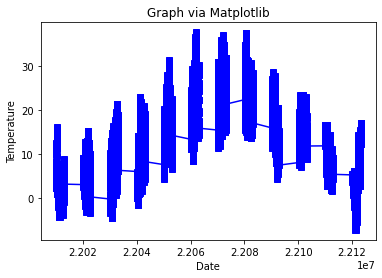

In [14]:
plt.plot(data_2022[:,0],data_2022[:,1],"b-s")
plt.title("Graph via Matplotlib")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

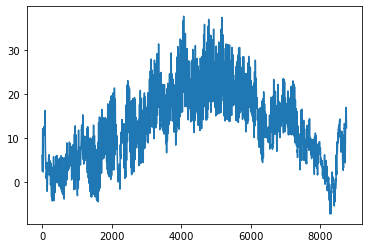

In [15]:
plt.plot(data_2022[:,1])
plt.show()

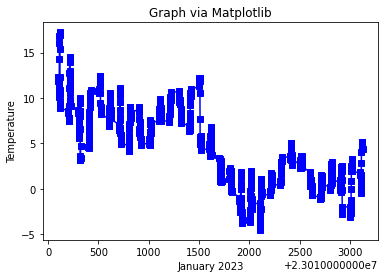

In [16]:
filter_1 = (data_np[:,0]>=23010100) & (data_np[:,0]<23020100)
plt.plot(data_np[filter_1,0],data_np[filter_1,1],"b-s")
plt.title("Graph via Matplotlib")
plt.xlabel("January 2023")
plt.ylabel("Temperature")
plt.show()

## Exporting a numpy array as a CSV file

While we are at it, here is how we can export a numpy array as CSV:

In [17]:
np.savetxt('del_this_file.csv', data_np, delimiter = ",")

##  Importing a CSV file with Pandas

Now that we have experienced the pains of the "old" method, let's revive the technique we have acquired last week: using `Pandas` to hold the data in a dataframe!

In [18]:
import pandas as pd

In [19]:
pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)
data1 = pd.read_csv("data/01_meteoblue_Basel_20230303T060433.csv",
                                         skiprows=9)
data1.columns = ['Timestamp','Temperature','Relative Humidity',
                 'Cloud Coverage', 'Sunshine Duration','Radiation']
data1 = data1.set_index('Timestamp')
data1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation
Timestamp,,,,,
20220101T0000,6.060245,94.19782,1.5,0.0,0.0
20220101T0100,5.560245,94.83262,3.0,0.0,0.0
20220101T0200,4.630245,96.47203,0.3,0.0,0.0
20220101T0300,3.660245,97.11870,1.2,0.0,0.0
20220101T0400,3.880245,96.16575,1.0,0.0,0.0
...,...,...,...,...,...
20230303T1900,NaN,NaN,NaN,NaN,NaN
20230303T2000,NaN,NaN,NaN,NaN,NaN
20230303T2100,NaN,NaN,NaN,NaN,NaN


Even though, it is completely possible to plot dataframe using matplotlib there's actually a much better way to do it: enter the seaborn module!

In [20]:
import seaborn as sns
sns.set_theme() # To make things appear "more cool" 8)

In [21]:
data1.loc[:,"Relative Humidity"].max()

100.06447

In [22]:
data1.loc[:,"Sunshine Duration"].max()

60.0

In [23]:
filter_202208w1 = ((data1.index>="20220801") & 
                 (data1.index<"20220808"))
data_202208w1 = data1.loc[filter_202208w1].copy()
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation
Timestamp,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0
...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0


In [24]:
data_202208w1.shape

(168, 5)

Here, it's as simple as it gets! We are just letting seaborne to figure out what we need:

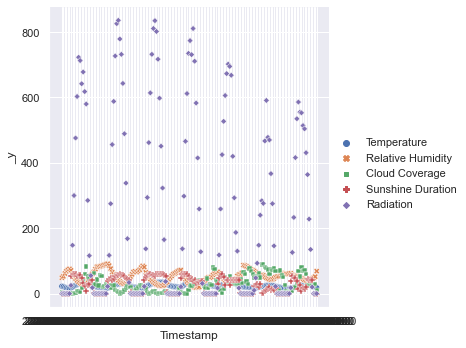

In [25]:
plt1 = sns.relplot(data=data_202208w1)

## Plotting a specific column
We can easily designate columns to be used for the x & y parameters for our graph:

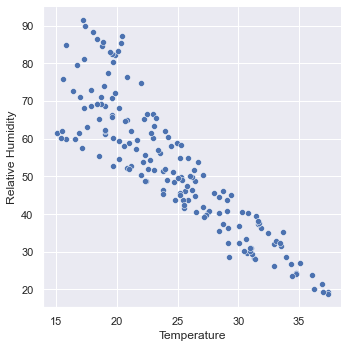

In [26]:
plt2 = sns.relplot(data=data_202208w1,x="Temperature",y="Relative Humidity")

And here is a beauty: by `hue` and `size` parameters, we can classify using other column values, making it easier to investigate the dependencies wrt these columns:

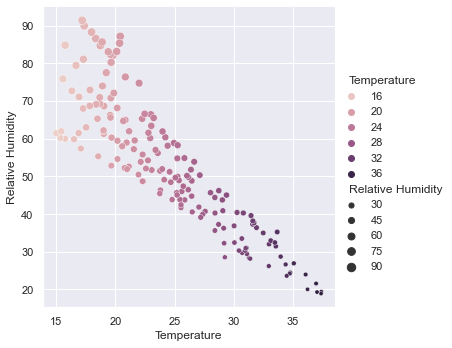

In [27]:
plt3 = sns.relplot(data=data_202208w1,x="Temperature",y="Relative Humidity",
                  hue="Temperature",size="Relative Humidity")

And this is our attempt to further classify things by adding the `style` alas it kind of fails

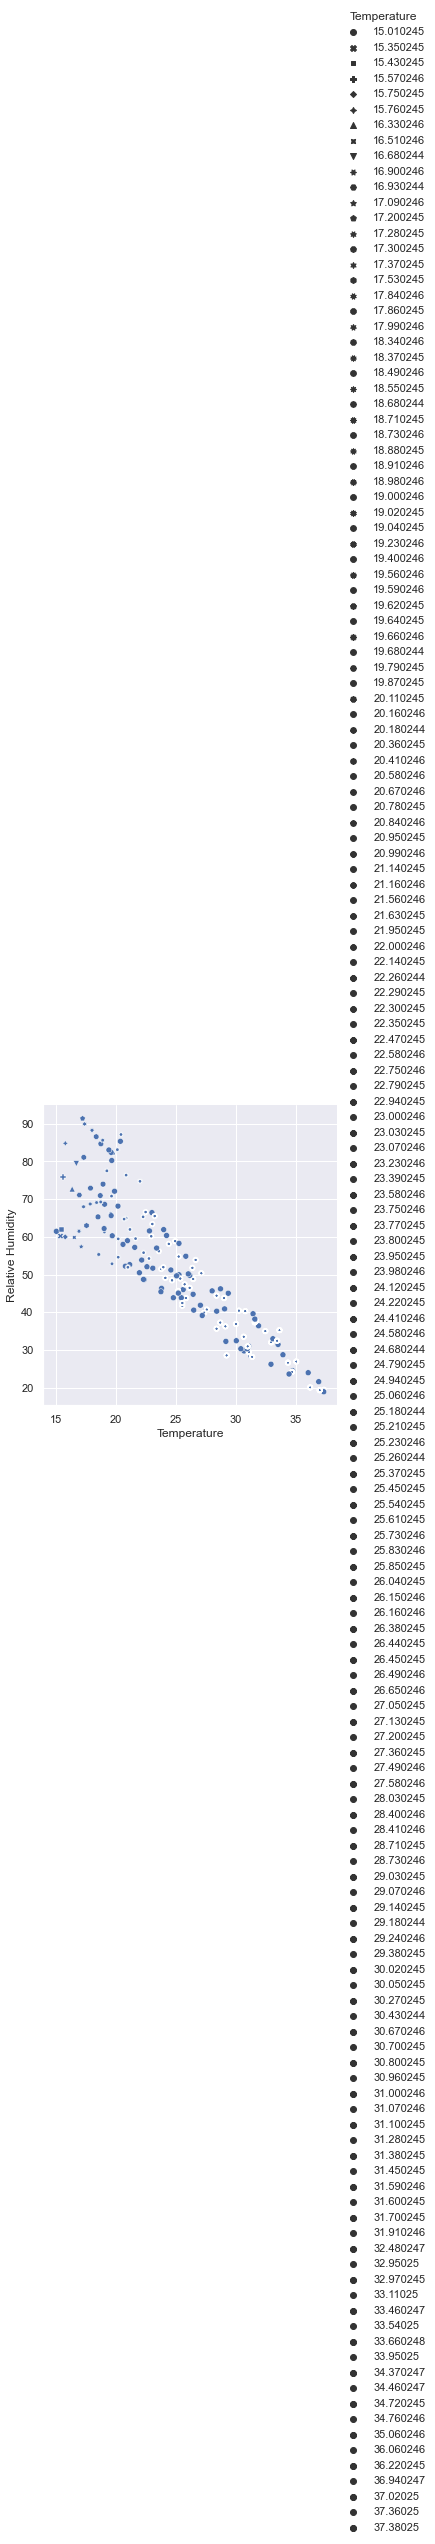

In [28]:
plt3 = sns.relplot(data=data_202208w1,x="Temperature",y="Relative Humidity",
                  style="Temperature")

Seems that it doesn't like so many classification wrt the values. Luckily we can work around it, by _smoothing_ things out! 8)

In [29]:
import numpy as np

In [30]:
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation
Timestamp,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0
...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0


In [31]:
print("T_min: {:.6f}C | T_max: {:.3f}C"
      .format(data_202208w1.Temperature.min(),data_202208w1.Temperature.max()))

T_min: 15.010245C | T_max: 37.380C


In [32]:
data_202208w1[data_202208w1.Temperature == data_202208w1.Temperature.min()]

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation
Timestamp,,,,,
20220807T0500,15.010245,61.463127,3.0,0.0,0.0


In [33]:
print(data_202208w1.index[data_202208w1.Temperature == data_202208w1.Temperature.min()][0])

20220807T0500


In [34]:
data_202208w1.Temperature/10

Timestamp
20220801T0000    2.235025
20220801T0100    2.114025
20220801T0200    1.902025
20220801T0300    1.728025
20220801T0400    1.633025
                   ...   
20220807T1900    2.521025
20220807T2000    2.375025
20220807T2100    2.229024
20220807T2200    2.099025
20220807T2300    1.784025
Name: Temperature, Length: 168, dtype: float64

In [35]:
np.floor(data_202208w1.Temperature / 10.0) * 10

Timestamp
20220801T0000    20.0
20220801T0100    20.0
20220801T0200    10.0
20220801T0300    10.0
20220801T0400    10.0
                 ... 
20220807T1900    20.0
20220807T2000    20.0
20220807T2100    20.0
20220807T2200    20.0
20220807T2300    10.0
Name: Temperature, Length: 168, dtype: float64

In [36]:
data_202208w1.Temperature

Timestamp
20220801T0000    22.350245
20220801T0100    21.140245
20220801T0200    19.020245
20220801T0300    17.280245
20220801T0400    16.330246
                   ...    
20220807T1900    25.210245
20220807T2000    23.750246
20220807T2100    22.290245
20220807T2200    20.990246
20220807T2300    17.840246
Name: Temperature, Length: 168, dtype: float64

Here we add a new column `TempFloor` that stores the smoothed out temperature values:

In [37]:
tempsf = np.floor(data_202208w1.loc[:,"Temperature"] / 10.0) * 10
data_202208w1.loc[:,"TempFloored"] = tempsf.loc[:]

In [38]:
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation,TempFloored
Timestamp,,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0,20.0
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0,20.0
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0,10.0
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0,10.0
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0,10.0
...,...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0,20.0
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0,20.0
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0,20.0


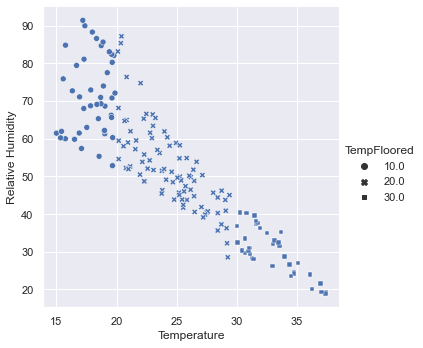

In [39]:
plt4 = sns.relplot(data=data_202208w1,x="Temperature",y="Relative Humidity",
                  style="TempFloored")

Enough with the scatter plots, lets connect the dots with the `kind` parameter:

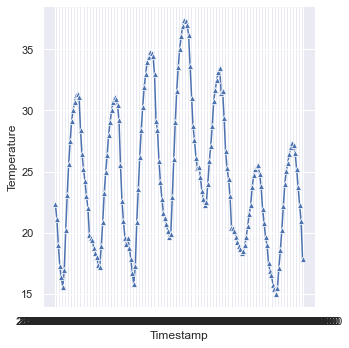

In [40]:
plt4 = sns.relplot(data=data_202208w1,x="Timestamp",y="Temperature", 
                   kind="line", marker="^")

Here is the same thing without the markers:

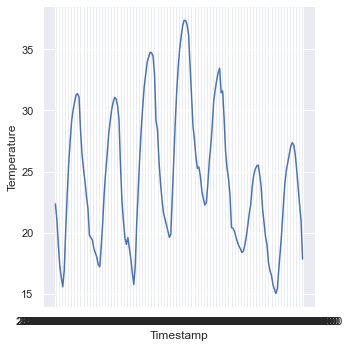

In [41]:
plt4 = sns.relplot(data=data_202208w1,x="Timestamp",y="Temperature", 
                   kind="line")

In [42]:
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation,TempFloored
Timestamp,,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0,20.0
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0,20.0
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0,10.0
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0,10.0
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0,10.0
...,...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0,20.0
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0,20.0
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0,20.0


Let's further classify such that those entries with their humidity above the mean value will be labeled as "humid", whereas those below will be "dry". 

Therefore, we have to start with calculating the mean:

In [43]:
data_202208w1["Relative Humidity"].mean()

52.46707050595234

and we define a new column for the job:

In [44]:
data_202208w1['RHClass'] = 0

In [45]:
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation,TempFloored,RHClass
Timestamp,,,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0,20.0,0
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0,20.0,0
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0,10.0,0
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0,10.0,0
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0,10.0,0
...,...,...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0,20.0,0
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0,20.0,0
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0,20.0,0


How do we single out the ones that have their humidity above the average? By filtering of course! 8)

In [46]:
filter_2 = data_202208w1['Relative Humidity']>52

In [47]:
data_202208w1.loc[filter_2,'RHClass']

Timestamp
20220801T0100    0
20220801T0200    0
20220801T0300    0
20220801T0400    0
20220801T0500    0
                ..
20220807T0700    0
20220807T0800    0
20220807T0900    0
20220807T1000    0
20220807T2300    0
Name: RHClass, Length: 82, dtype: int64

In [48]:
filter_2

Timestamp
20220801T0000    False
20220801T0100     True
20220801T0200     True
20220801T0300     True
20220801T0400     True
                 ...  
20220807T1900    False
20220807T2000    False
20220807T2100    False
20220807T2200    False
20220807T2300     True
Name: Relative Humidity, Length: 168, dtype: bool

In [49]:
np.invert(filter_2)

Timestamp
20220801T0000     True
20220801T0100    False
20220801T0200    False
20220801T0300    False
20220801T0400    False
                 ...  
20220807T1900     True
20220807T2000     True
20220807T2100     True
20220807T2200     True
20220807T2300    False
Name: Relative Humidity, Length: 168, dtype: bool

So, we fill the 'RHClass' column of the ones above the mean with "humid"; and with "dry" for the others (please observe how we invert the booleans with the "invert").

In [50]:
data_202208w1.loc[filter_2,'RHClass'] = 'humid'
data_202208w1.loc[np.invert(filter_2),'RHClass'] = 'dry'

In [51]:
data_202208w1

,Temperature,Relative Humidity,Cloud Coverage,Sunshine Duration,Radiation,TempFloored,RHClass
Timestamp,,,,,,,
20220801T0000,22.350245,48.665290,4.000000,0.000000,0.0,20.0,dry
20220801T0100,21.140245,52.629486,1.000000,0.000000,0.0,20.0,humid
20220801T0200,19.020245,61.299694,1.000000,0.000000,0.0,10.0,humid
20220801T0300,17.280245,68.006490,0.000000,0.000000,0.0,10.0,humid
20220801T0400,16.330246,72.687810,0.000000,0.000000,0.0,10.0,humid
...,...,...,...,...,...,...,...
20220807T1900,25.210245,45.069187,27.000002,42.765953,135.0,20.0,dry
20220807T2000,23.750246,45.444828,27.000002,41.138474,20.0,20.0,dry
20220807T2100,22.290245,48.713924,27.000002,0.000000,0.0,20.0,dry


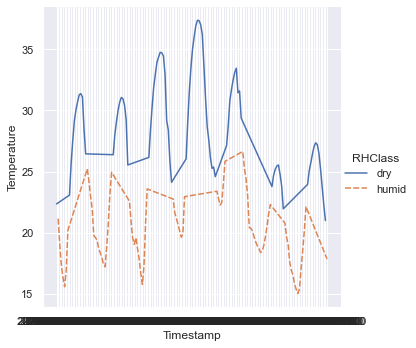

In [52]:
plt5 = sns.relplot(data=data_202208w1,x="Timestamp",y="Temperature",\
                   kind="line", 
                   style="RHClass", hue="RHClass")

Text(0.5, 0.98, 'Test Graph')

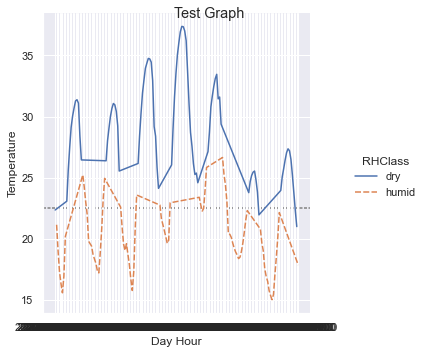

In [53]:
(plt5.map(plt.axhline,y = 22.5, color=".5", dashes=(2, 1), zorder=0)
.set_axis_labels("Day Hour", "Temperature")
.fig.suptitle("Test Graph"))

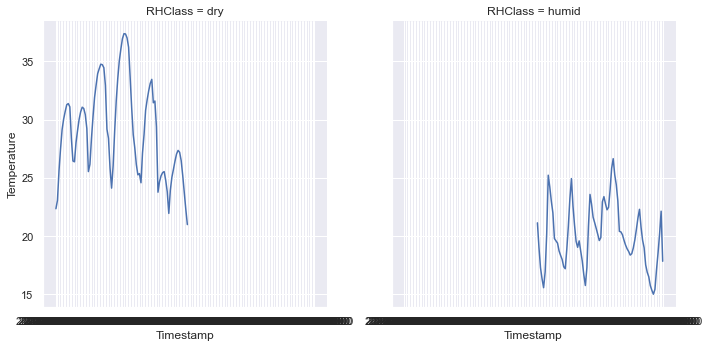

In [54]:
plt5 = sns.relplot(data=data_202208w1,x="Timestamp", y="Temperature", 
                   kind="line", col="RHClass")

## Histogram Plots
Histogram bars are also essential - especially if we are dealing with distributions.

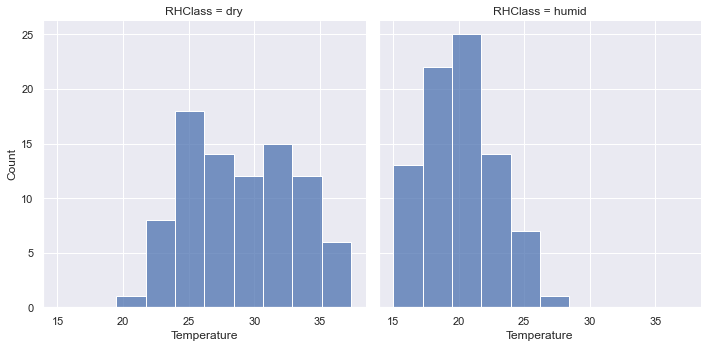

In [55]:
plt6 = sns.displot(data=data_202208w1,x="Temperature",
                   col="RHClass",bins=10)

In [56]:
data_g = np.random.normal(0,10,1000)

In [57]:
data_g

array([ 6.23445374e+00, -1.39502855e+01, -8.23092866e+00,  1.06544818e+01,
       -3.75146300e+00,  3.32420517e+00,  6.64583624e-01, -4.68513881e+00,
       -4.98497977e+00, -1.26077991e+00, -7.64907626e+00, -9.72748545e+00,
        1.92263957e+01,  1.48667218e+01,  7.34159352e+00,  1.23832775e+01,
       -3.26892558e+00,  4.94547970e+00, -3.69063004e+00, -1.93219398e+01,
        2.14299666e+01, -6.57022644e+00,  9.80453668e+00, -7.18388209e+00,
       -4.04037061e+00,  6.08738067e+00, -5.22401181e+00, -1.42976641e+00,
        7.09410533e+00,  1.32947444e+00,  4.30973119e+00, -1.37321883e+01,
       -1.88733215e+01, -3.28504294e+00, -1.96628865e+00,  2.30622989e+01,
        1.39128422e+01,  1.40891370e+00, -9.33600543e+00,  1.04919787e+01,
       -9.02427975e+00,  8.98677166e+00, -1.14709717e+01,  1.87678364e+01,
       -6.94344393e+00,  8.81493228e+00, -1.49147997e+01, -3.77505525e+00,
        7.62177423e+00,  4.89495272e-01, -1.98673983e+01, -1.13192553e+01,
       -2.04586381e+01,  

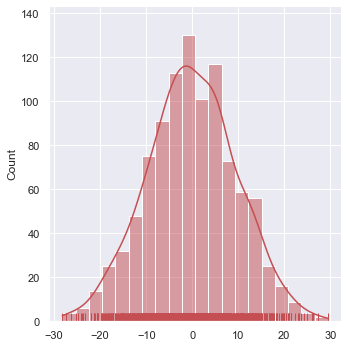

In [58]:
plt_gauss = sns.displot(data_g,bins=20,color="r",kde=True,rug=True,)

# Summary / Practical Case

## 'Old Style' plot parameters

In [59]:
x_val = np.linspace(-4,5,20)
y_val = x_val**2-2*x_val-7

df_xy = pd.DataFrame({'xx':x_val,'yy':y_val})

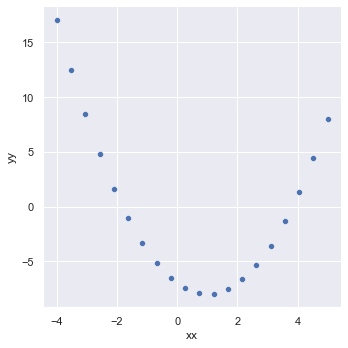

In [60]:
plt_xy = sns.relplot(data=df_xy,x='xx',y='yy')

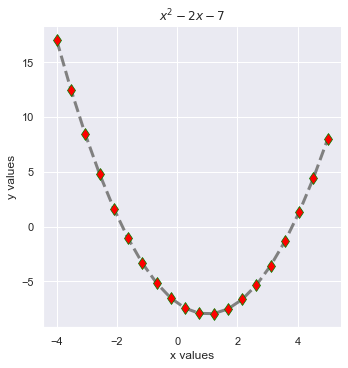

In [61]:
plt_xy = sns.relplot(data=df_xy,x='xx',y='yy',
                     kind="line",marker="d",
                    markersize=9,markerfacecolor="red",
                    markeredgecolor="green",
                    color="gray",linestyle="--",linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title(r'$x^2-2x-7$')
plt.show()

## Pretty much all the useful set

In [62]:
N  = 10
data2 = pd.DataFrame(np.empty((N*N,3),int),columns=['x','y','val'])
k = 0
for i in range(N):
    for j in range(N):
        data2.iloc[k,:] = [i,j,np.random.rand()]
        k += 1
data2

,x,y,val
0,0,0,0.431782
1,0,1,0.065295
2,0,2,0.447773
3,0,3,0.591480
4,0,4,0.202280
...,...,...,...
95,9,5,0.152586
96,9,6,0.630253
97,9,7,0.186234
98,9,8,0.898645


In [63]:
data2['xymod'] = np.mod(data2.x+data2.y,5)
data2

,x,y,val,xymod
0,0,0,0.431782,0
1,0,1,0.065295,1
2,0,2,0.447773,2
3,0,3,0.591480,3
4,0,4,0.202280,4
...,...,...,...,...
95,9,5,0.152586,4
96,9,6,0.630253,0
97,9,7,0.186234,1
98,9,8,0.898645,2


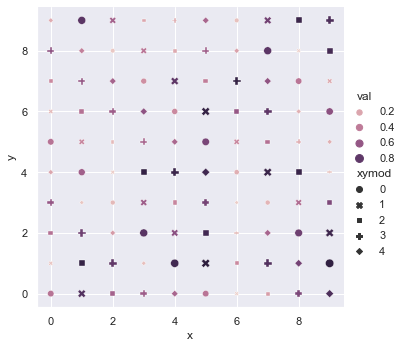

In [64]:
plt2 = sns.relplot(data=data2,x='x',y='y',hue='val',
                       size='val',style='xymod')
#k=plt.legend(bbox_to_anchor=(1.8,1.01),loc='upper right')
#plt.show()

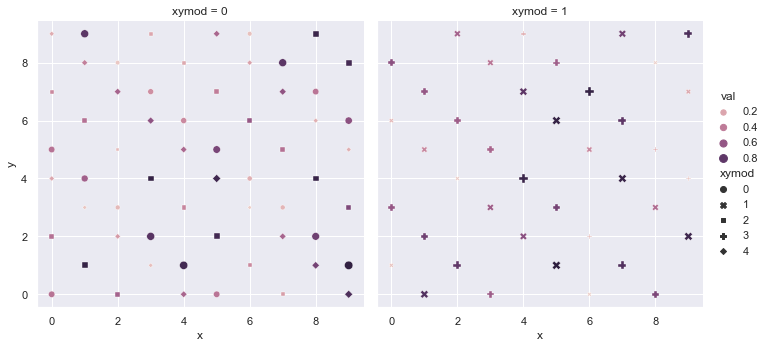

In [65]:
plt3 = sns.relplot(data=data2,x='x',y='y',hue='val',
                       size='val',style='xymod',col=np.mod(data2.xymod,2))
plt.show()

# References
* [meteoblue.com - Historical Weather Data for Basel](https://www.meteoblue.com/en/weather/archive/export?daterange=2022-01-01%20-%202023-03-03&locations%5B%5D=basel_switzerland_2661604&domain=ERA5T&min=2022-01-01&max=2023-03-03&params%5B%5D=&params%5B%5D=temp2m&params%5B%5D=&params%5B%5D=relhum2m&params%5B%5D=&params%5B%5D=&params%5B%5D=totalClouds&params%5B%5D=&params%5B%5D=sunshine&params%5B%5D=swrad&params%5B%5D=&params%5B%5D=&params%5B%5D=&utc_offset=1&timeResolution=hourly&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30)